# Project 02 — Volatility Clustering in Financial Returns



This notebook explores one of the most important stylized facts in quantitative finance:
**volatility clustering**.

While financial returns are largely unpredictable, their volatility exhibits strong
temporal dependence. This phenomenon violates the IID assumption and has major implications
for risk modeling, portfolio construction, and machine learning in finance.


## Objectives

The goals of this notebook are to:

- Show that returns have little to no autocorrelation
- Demonstrate that volatility is persistent over time
- Visualize volatility clustering using multiple approaches
- Discuss why volatility is more predictable than returns
- Explain the implications for financial machine learning



## Data Description

This project analyzes **daily financial time series data** to study one of the most
well-known stylized facts in finance: **volatility clustering**.

### Asset
- **SPY (S&P 500 ETF)** as a proxy for the U.S. equity market

### Frequency
- Daily observations

### Time Period
- 2010-01-01 to 2024-01-01

### Variables Used
- Closing prices (`Close`)
- Log-returns derived from closing prices

### Data Source
- Data downloaded using the `yfinance` Python library

The results presented here are **robust stylized facts** and do not depend on the
specific asset chosen, as long as it is liquid and actively traded.


Imports & Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf


plt.style.use("default")


In [ ]:
# Download daily price data
ticker = "SPY"

data = yf.download(
    ticker,
    start="2010-01-01",
    end="2024-01-01",
    progress=False
)

data.head()


/tmp/ipython-input-3661097424.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2010-01-04,85.027939,85.072953,83.662450,84.307682,118944600
2010-01-05,85.253021,85.290537,84.667813,84.975426,111579900
2010-01-06,85.313049,85.523124,85.102975,85.170496,116074400
2010-01-07,85.673195,85.778232,84.915422,85.155508,131091100
2010-01-08,85.958275,85.995791,85.275533,85.448092,126402800


## Data Preparation

We work with daily financial returns rather than prices.
Returns are the fundamental object of study in financial modeling,
as they are more stable and additive over time.


Returns Calculation

In [ ]:
# Use closing prices
prices = data["Close"]

# Compute log-returns
returns = np.log(prices / prices.shift(1)).dropna()

returns.head()


Ticker,SPY
Date,
2010-01-05,0.002644
2010-01-06,0.000704
2010-01-07,0.004213
2010-01-08,0.003322
2010-01-11,0.001396


## Why Log-Returns?

Log-returns are preferred in financial analysis because:

- They are time-additive
- They stabilize variance
- They are closer to stationarity than price levels

All subsequent volatility analyses are based on these log-returns.


## Returns vs Volatility

Raw returns often look like noise.
However, transformations of returns (such as squared returns)
reveal important structure related to volatility.


Plot Returns

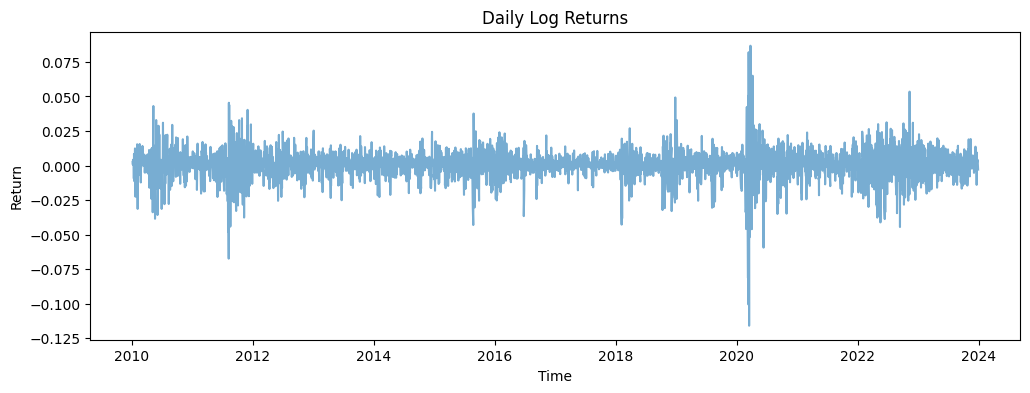

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(returns, alpha=0.6)
plt.title("Daily Log Returns")
plt.xlabel("Time")
plt.ylabel("Return")
plt.show()


Plot Squared Returns

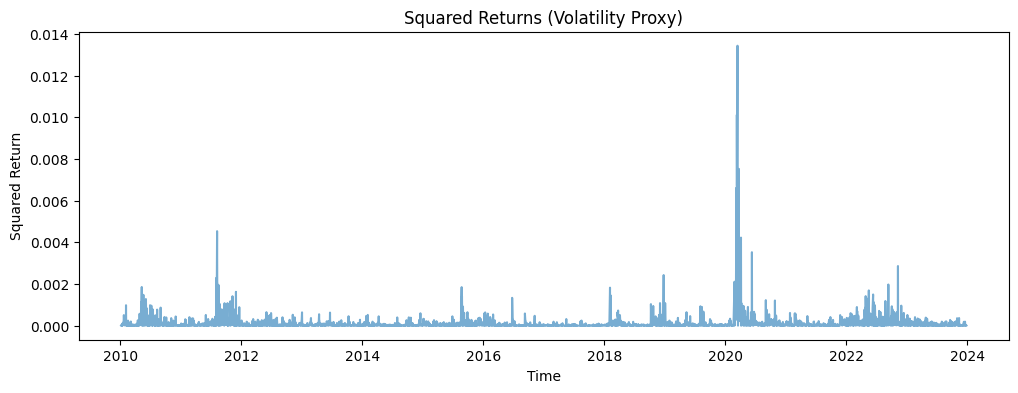

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(returns**2, alpha=0.6)
plt.title("Squared Returns (Volatility Proxy)")
plt.xlabel("Time")
plt.ylabel("Squared Return")
plt.show()


While raw returns appear close to white noise,
squared returns display visible clustering.

This suggests that periods of high volatility
tend to be followed by high volatility,
and periods of low volatility tend to persist.


## Autocorrelation Analysis

A key diagnostic tool in time series analysis is the autocorrelation function (ACF).

We compare:
- Autocorrelation of raw returns
- Autocorrelation of squared returns


ACF of Returns

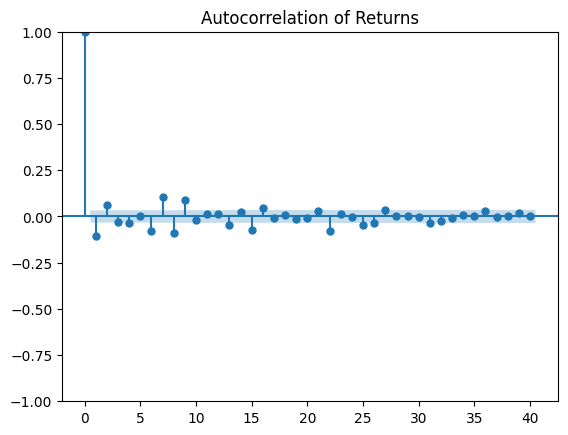

In [ ]:
plot_acf(returns, lags=40)
plt.title("Autocorrelation of Returns")
plt.show()


ACF of Squared Returns

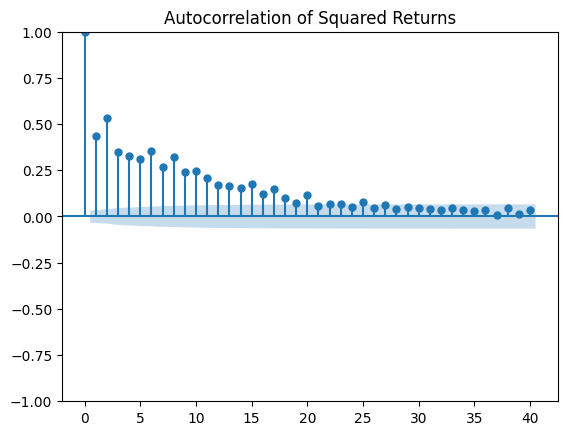

In [ ]:
plot_acf(returns**2, lags=40)
plt.title("Autocorrelation of Squared Returns")
plt.show()


Key Insight

Returns exhibit little to no autocorrelation,
but squared returns show strong and persistent autocorrelation.

This is a defining characteristic of volatility clustering
and a direct violation of the IID assumption.


## Rolling Volatility

Another intuitive way to visualize volatility clustering
is through rolling volatility estimates.


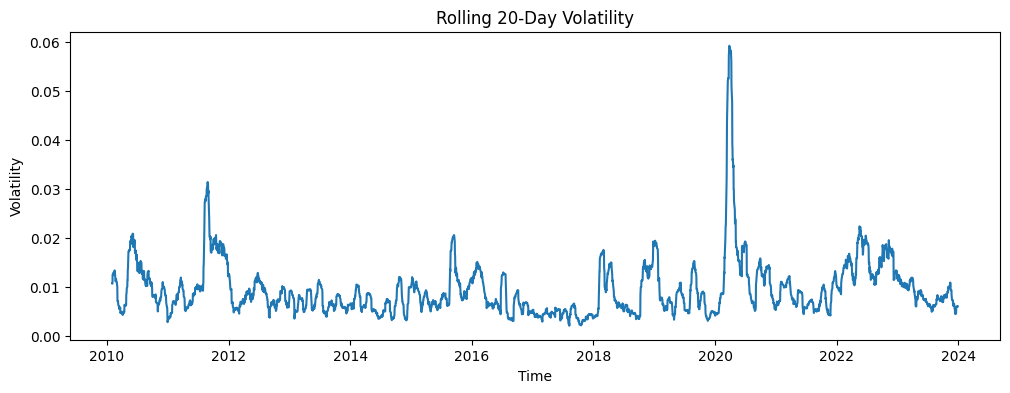

In [ ]:
rolling_vol = returns.rolling(window=20).std()

plt.figure(figsize=(12, 4))
plt.plot(rolling_vol)
plt.title("Rolling 20-Day Volatility")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.show()


## Implications for Financial Modeling

Volatility clustering explains why:

- Risk is time-varying
- Static risk models underestimate exposure
- Volatility is more predictable than returns

This motivates volatility models such as GARCH
and volatility-based features in machine learning.


## Implications for Machine Learning

Volatility clustering violates the i.i.d. assumption commonly required by
many machine learning algorithms.

Ignoring this structure can lead to:
- Overfitting
- Misestimated risk
- Poor out-of-sample performance

This motivates the use of volatility-aware models such as GARCH,
regime-switching models, or feature engineering techniques that explicitly
capture conditional heteroskedasticity.



## Conclusion

Volatility clustering is a fundamental property of financial markets.

While returns are largely unpredictable,
volatility exhibits strong persistence and structure.

Understanding this stylized fact is essential before applying
machine learning models to financial data.

Volatility clustering explains why naive machine learning models often fail
in financial markets and highlights the need for domain-specific modeling
choices in quantitative finance.



Final Note

This notebook is part of a public portfolio on Financial Machine Learning,
inspired by *Machine Learning and Data Science Blueprints for Finance*
and *Advances in Financial Machine Learning*.
